# Introducción a Trading Algorítmico

### XLSXWRITER

In [1]:
pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 2.9 MB/s eta 0:00:00


XlsxWriter es una librería de Python que permite crear y escribir archivos Excel en formato .xlsx de manera eficiente y flexible. Se utiliza con pandas para exportar DataFrames a Excel, especialmente cuando necesitas personalizar el archivo resultante.

¿Por qué usar XlsxWriter?  
Formato Avanzado: Puedes personalizar celdas, agregar colores, fuentes, bordes, y otros estilos.  
Múltiples Hojas: Facilita la creación de varios "sheets" en un mismo archivo Excel.  
Gráficos y Tablas: Permite insertar gráficos, tablas dinámicas y otras visualizaciones.  
Optimización: Es rápido y eficiente para manejar grandes cantidades de datos.
Compatibilidad con Pandas: Se integra perfectamente con pd.ExcelWriter para exportar DataFrames.  


### MPLFINANCE

In [2]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00


mplfinance es una librería de Python que facilita la creación de gráficos financieros, especialmente para el análisis técnico y la visualización de series temporales de precios, como velas japonesas (candlestick), gráficos de barras, líneas, y otros tipos de visualizaciones comunes en trading. Utiliza matplotlib como motor de renderizado, simplificando el proceso de graficación para datos financieros.  

Altenativas

plotly:

Gráficos interactivos, ideales para dashboards o entornos web.
Más complejo que mplfinance, pero con mucha flexibilidad.  

📊 bokeh:

Enfocada en gráficos interactivos para web.
Ideal para visualizar grandes volúmenes de datos sin perder fluidez.  

⚡ matplotlib (sin mplfinance):

Muy potente, pero requiere bastante código para crear gráficos financieros específicos.
Si necesitas flexibilidad total, es una buena opción.  

📈 pyfolio:

Más orientada a análisis de portafolios que a visualización de precios individuales.
Se integra bien con quantlib y zipline.  

📌 ta-lib y bt:

No se centran tanto en la visualización, pero aportan herramientas poderosas para análisis técnico y backtesting.

In [3]:
import numpy as np #The Numpy numerical computing library
import pandas as pd #The Pandas data science library
import requests #The requests library for HTTP requests in Python
import xlsxwriter #The XlsxWriter libarary for
import math #The Python math module
import matplotlib.pyplot as plt
import mplfinance as mpf

### API Token

Los API tokens (y cualquier otra información sesnsible) debe guardarse en un archivo distinto secrets.py que no debe ser compartido. Inicialmente usaremos un sandbox API token, lo cual significa que no son datos reales de mercado.

Debemos mover el archivo secrets.py al mismo folder en que se encuentra el Jupyther notebook.

https://www.alphavantage.co/

## Primer API Call - Datos Intradía

In [15]:
#API key
ALPHA_VANTAGE_API_KEY = 'ZMN2WBUJ582P7LEW'
symbol='AAPL'
interval='5min'

In [16]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&apikey={ALPHA_VANTAGE_API_KEY}'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'AAPL', '3. Last Refreshed': '2025-03-17 19:55:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2025-03-17 19:55:00': {'1. open': '213.8800', '2. high': '213.9300', '3. low': '213.8092', '4. close': '213.9300', '5. volume': '3355'}, '2025-03-17 19:50:00': {'1. open': '213.9500', '2. high': '213.9766', '3. low': '213.8800', '4. close': '213.8812', '5. volume': '741'}, '2025-03-17 19:45:00': {'1. open': '213.8600', '2. high': '214.0000', '3. low': '213.8240', '4. close': '213.9999', '5. volume': '947'}, '2025-03-17 19:40:00': {'1. open': '213.7630', '2. high': '213.9000', '3. low': '213.7600', '4. close': '213.9000', '5. volume': '2112'}, '2025-03-17 19:35:00': {'1. open': '213.9000', '2. high': '213.9000', '3. low': '213.7500', '4. close': '213.8800', '5. volume': '129'}, '2025-03-17 19:30:00': {'1. open': '213.7200', '2

In [17]:
data.keys()

dict_keys(['Meta Data', 'Time Series (5min)'])

In [18]:
data['Meta Data']

{'1. Information': 'Intraday (5min) open, high, low, close prices and volume',
 '2. Symbol': 'AAPL',
 '3. Last Refreshed': '2025-03-17 19:55:00',
 '4. Interval': '5min',
 '5. Output Size': 'Compact',
 '6. Time Zone': 'US/Eastern'}

In [19]:
data['Time Series (5min)']

{'2025-03-17 19:55:00': {'1. open': '213.8800',
  '2. high': '213.9300',
  '3. low': '213.8092',
  '4. close': '213.9300',
  '5. volume': '3355'},
 '2025-03-17 19:50:00': {'1. open': '213.9500',
  '2. high': '213.9766',
  '3. low': '213.8800',
  '4. close': '213.8812',
  '5. volume': '741'},
 '2025-03-17 19:45:00': {'1. open': '213.8600',
  '2. high': '214.0000',
  '3. low': '213.8240',
  '4. close': '213.9999',
  '5. volume': '947'},
 '2025-03-17 19:40:00': {'1. open': '213.7630',
  '2. high': '213.9000',
  '3. low': '213.7600',
  '4. close': '213.9000',
  '5. volume': '2112'},
 '2025-03-17 19:35:00': {'1. open': '213.9000',
  '2. high': '213.9000',
  '3. low': '213.7500',
  '4. close': '213.8800',
  '5. volume': '129'},
 '2025-03-17 19:30:00': {'1. open': '213.7200',
  '2. high': '213.9000',
  '3. low': '213.7200',
  '4. close': '213.9000',
  '5. volume': '514'},
 '2025-03-17 19:25:00': {'1. open': '213.9000',
  '2. high': '213.9400',
  '3. low': '213.7200',
  '4. close': '213.8000',

In [20]:
len(data['Time Series (5min)'])

100

In [22]:
data['Time Series (5min)']['2025-03-17 13:10:00']

{'1. open': '211.3400',
 '2. high': '211.6800',
 '3. low': '211.1800',
 '4. close': '211.6700',
 '5. volume': '194531'}

## API Call: Datos Diarios

In [26]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={ALPHA_VANTAGE_API_KEY}'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'AAPL', '3. Last Refreshed': '2025-03-17', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2025-03-17': {'1. open': '213.3100', '2. high': '215.2200', '3. low': '209.9700', '4. close': '214.0000', '5. volume': '48073426'}, '2025-03-14': {'1. open': '211.2500', '2. high': '213.9500', '3. low': '209.5800', '4. close': '213.4900', '5. volume': '60107582'}, '2025-03-13': {'1. open': '215.9500', '2. high': '216.8394', '3. low': '208.4200', '4. close': '209.6800', '5. volume': '61368330'}, '2025-03-12': {'1. open': '220.1400', '2. high': '221.7500', '3. low': '214.9100', '4. close': '216.9800', '5. volume': '62547467'}, '2025-03-11': {'1. open': '223.8050', '2. high': '225.8399', '3. low': '217.4500', '4. close': '220.8400', '5. volume': '76137410'}, '2025-03-10': {'1. open': '235.5400', '2. high': '236.1600', '3. low': '224.2200', '4. close': '227.4800', '5

In [27]:
data.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [28]:
data['Meta Data']

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'AAPL',
 '3. Last Refreshed': '2025-03-17',
 '4. Output Size': 'Compact',
 '5. Time Zone': 'US/Eastern'}

In [29]:
data['Time Series (Daily)']

{'2025-03-17': {'1. open': '213.3100',
  '2. high': '215.2200',
  '3. low': '209.9700',
  '4. close': '214.0000',
  '5. volume': '48073426'},
 '2025-03-14': {'1. open': '211.2500',
  '2. high': '213.9500',
  '3. low': '209.5800',
  '4. close': '213.4900',
  '5. volume': '60107582'},
 '2025-03-13': {'1. open': '215.9500',
  '2. high': '216.8394',
  '3. low': '208.4200',
  '4. close': '209.6800',
  '5. volume': '61368330'},
 '2025-03-12': {'1. open': '220.1400',
  '2. high': '221.7500',
  '3. low': '214.9100',
  '4. close': '216.9800',
  '5. volume': '62547467'},
 '2025-03-11': {'1. open': '223.8050',
  '2. high': '225.8399',
  '3. low': '217.4500',
  '4. close': '220.8400',
  '5. volume': '76137410'},
 '2025-03-10': {'1. open': '235.5400',
  '2. high': '236.1600',
  '3. low': '224.2200',
  '4. close': '227.4800',
  '5. volume': '71451281'},
 '2025-03-07': {'1. open': '235.1050',
  '2. high': '241.3700',
  '3. low': '234.7600',
  '4. close': '239.0700',
  '5. volume': '46273565'},
 '2025

In [30]:
len(data['Time Series (Daily)'])

100

In [31]:
data['Time Series (Daily)']['2024-10-22']

{'1. open': '233.8850',
 '2. high': '236.2200',
 '3. low': '232.6000',
 '4. close': '235.8600',
 '5. volume': '38846578'}

### Crear un Dataframe con los datos obtenidos desde el API

In [32]:
valores = pd.DataFrame(list(data['Time Series (Daily)'].values()))

In [33]:
valores

,1. open,2. high,3. low,4. close,5. volume
0,213.3100,215.2200,209.9700,214.0000,48073426
1,211.2500,213.9500,209.5800,213.4900,60107582
2,215.9500,216.8394,208.4200,209.6800,61368330
3,220.1400,221.7500,214.9100,216.9800,62547467
4,223.8050,225.8399,217.4500,220.8400,76137410
...,...,...,...,...,...
95,229.7400,233.2200,229.5700,231.4100,38802304
96,229.9800,230.8200,228.4100,230.5700,31109503
97,234.0800,235.1440,227.7600,230.7600,52286979
98,233.8850,236.2200,232.6000,235.8600,38846578


In [34]:
#Creamos un dataframe para gusrdar los datos diarios en forma tabular
my_columns = ['Date', 'Ticker', 'Open','High', 'Low', 'Close', 'Volume']
final_dataframe = pd.DataFrame(columns = my_columns)
final_dataframe

,Date,Ticker,Open,High,Low,Close,Volume


In [35]:
final_dataframe['Date']=data['Time Series (Daily)'].keys()
final_dataframe['Ticker']='AAPL'
final_dataframe['Open']= valores['1. open'].astype(float)
final_dataframe['High']=valores['2. high'].astype(float)
final_dataframe['Low']=valores['3. low'].astype(float)
final_dataframe['Close']=valores['4. close'].astype(float)
final_dataframe['Volume']=valores['5. volume'].astype(float)
final_dataframe

,Date,Ticker,Open,High,Low,Close,Volume
0,2025-03-17,AAPL,213.310,215.2200,209.97,214.00,48073426.0
1,2025-03-14,AAPL,211.250,213.9500,209.58,213.49,60107582.0
2,2025-03-13,AAPL,215.950,216.8394,208.42,209.68,61368330.0
3,2025-03-12,AAPL,220.140,221.7500,214.91,216.98,62547467.0
4,2025-03-11,AAPL,223.805,225.8399,217.45,220.84,76137410.0
...,...,...,...,...,...,...,...
95,2024-10-25,AAPL,229.740,233.2200,229.57,231.41,38802304.0
96,2024-10-24,AAPL,229.980,230.8200,228.41,230.57,31109503.0
97,2024-10-23,AAPL,234.080,235.1440,227.76,230.76,52286979.0
98,2024-10-22,AAPL,233.885,236.2200,232.60,235.86,38846578.0


In [36]:
datetime_index = pd.to_datetime(final_dataframe['Date'])
final_dataframe = final_dataframe.set_index(datetime_index, inplace=False)
final_dataframe


,Date,Ticker,Open,High,Low,Close,Volume
Date,,,,,,,
2025-03-17,2025-03-17,AAPL,213.310,215.2200,209.97,214.00,48073426.0
2025-03-14,2025-03-14,AAPL,211.250,213.9500,209.58,213.49,60107582.0
2025-03-13,2025-03-13,AAPL,215.950,216.8394,208.42,209.68,61368330.0
2025-03-12,2025-03-12,AAPL,220.140,221.7500,214.91,216.98,62547467.0
2025-03-11,2025-03-11,AAPL,223.805,225.8399,217.45,220.84,76137410.0
...,...,...,...,...,...,...,...
2024-10-25,2024-10-25,AAPL,229.740,233.2200,229.57,231.41,38802304.0
2024-10-24,2024-10-24,AAPL,229.980,230.8200,228.41,230.57,31109503.0
2024-10-23,2024-10-23,AAPL,234.080,235.1440,227.76,230.76,52286979.0


In [37]:
final_dataframe = final_dataframe.drop(columns=['Date'])
final_dataframe

,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2025-03-17,AAPL,213.310,215.2200,209.97,214.00,48073426.0
2025-03-14,AAPL,211.250,213.9500,209.58,213.49,60107582.0
2025-03-13,AAPL,215.950,216.8394,208.42,209.68,61368330.0
2025-03-12,AAPL,220.140,221.7500,214.91,216.98,62547467.0
2025-03-11,AAPL,223.805,225.8399,217.45,220.84,76137410.0
...,...,...,...,...,...,...
2024-10-25,AAPL,229.740,233.2200,229.57,231.41,38802304.0
2024-10-24,AAPL,229.980,230.8200,228.41,230.57,31109503.0
2024-10-23,AAPL,234.080,235.1440,227.76,230.76,52286979.0


In [39]:
final_dataframe = final_dataframe.sort_index(ascending=True)
final_dataframe

,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2024-10-21,AAPL,234.450,236.8500,234.45,236.48,36254470.0
2024-10-22,AAPL,233.885,236.2200,232.60,235.86,38846578.0
2024-10-23,AAPL,234.080,235.1440,227.76,230.76,52286979.0
2024-10-24,AAPL,229.980,230.8200,228.41,230.57,31109503.0
2024-10-25,AAPL,229.740,233.2200,229.57,231.41,38802304.0
...,...,...,...,...,...,...
2025-03-11,AAPL,223.805,225.8399,217.45,220.84,76137410.0
2025-03-12,AAPL,220.140,221.7500,214.91,216.98,62547467.0
2025-03-13,AAPL,215.950,216.8394,208.42,209.68,61368330.0


### Guardamos los datos en un Archivo de Excel

In [40]:
with pd.ExcelWriter('datos.xlsx', engine='xlsxwriter') as writer:
    final_dataframe.to_excel(writer, sheet_name='datos_AAPLE', index=False)

### Gráficos de velas japonesas

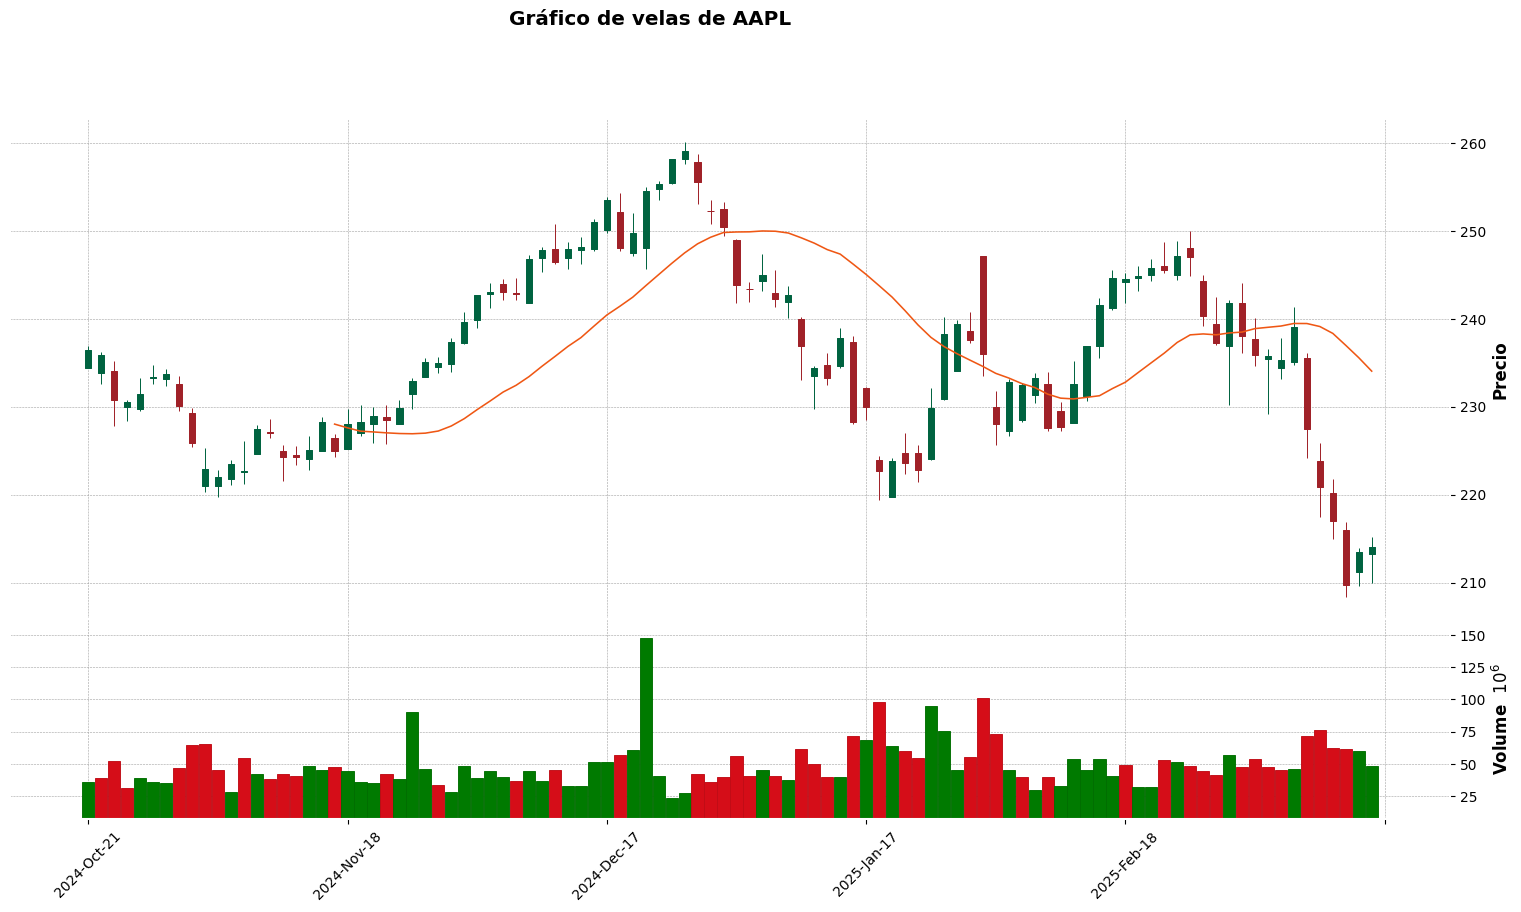

In [41]:
# Configurar el gráfico de velas con la media móvil
mpf.plot(final_dataframe, type='candle', style='charles',
         title='Gráfico de velas de AAPL',
         ylabel='Precio',
         mav=(20,),  # Agrega la media móvil de 20 periodos
         volume=True,
         figsize=(20, 10))

### Datos con yahoo finance

In [42]:
#Importamos librerías
import yfinance as yf
import pandas as pd
import numpy as np
import mplfinance as mpf
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [43]:
# Definir el ticker y el período de tiempo
ticker = "AAPL"  # Cambia por el activo que desees analizar
data = yf.download(ticker, start="2023-01-01", end="2025-03-07", interval="1d")  # Últimos 3 meses, velas diarias

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [44]:
#primeros 5 datos
data.head(5)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.632523,129.395510,122.742865,128.782641,112117500
2023-01-04,124.907700,127.181268,123.642412,125.431607,89113600
2023-01-05,123.583092,126.301485,123.326085,125.668841,80962700
2023-01-06,128.130234,128.792531,123.454601,124.561732,87754700
2023-01-09,128.654129,131.876670,128.397123,128.970458,70790800


In [45]:
#últimos 5 datos
data.tail(5)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-02-28,241.839996,242.089996,230.199997,236.949997,56833400
2025-03-03,238.029999,244.029999,236.110001,241.789993,47184000
2025-03-04,235.929993,240.070007,234.679993,237.710007,53798100
2025-03-05,235.740005,236.550003,229.229996,235.419998,47227600
2025-03-06,235.330002,237.860001,233.160004,234.440002,45170400


In [46]:
len(data)

545

In [47]:
# Convertir el índice a datetime si no lo está
data.index = pd.to_datetime(data.index)

# Asegurar que los valores sean numéricos (puede haber NaN)
data = data.apply(pd.to_numeric, errors='coerce')

# Mostrar información general del DataFrame
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 545 entries, 2023-01-03 to 2025-03-06
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   545 non-null    float64
 1   (High, AAPL)    545 non-null    float64
 2   (Low, AAPL)     545 non-null    float64
 3   (Open, AAPL)    545 non-null    float64
 4   (Volume, AAPL)  545 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 25.5 KB
None
Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.632523  129.395510  122.742865  128.782641  112117500
2023-01-04  124.907700  127.181268  123.642412  125.431607   89113600
2023-01-05  123.583092  126.301485  123.326085  125.668841   80962700
2023-01-06  128.130234  128.792531  123.454601  124.561732   87754700
2023-01-09  128.

In [48]:
data.columns=[ 'Open', 'High', 'Low', 'Close', 'Volume']

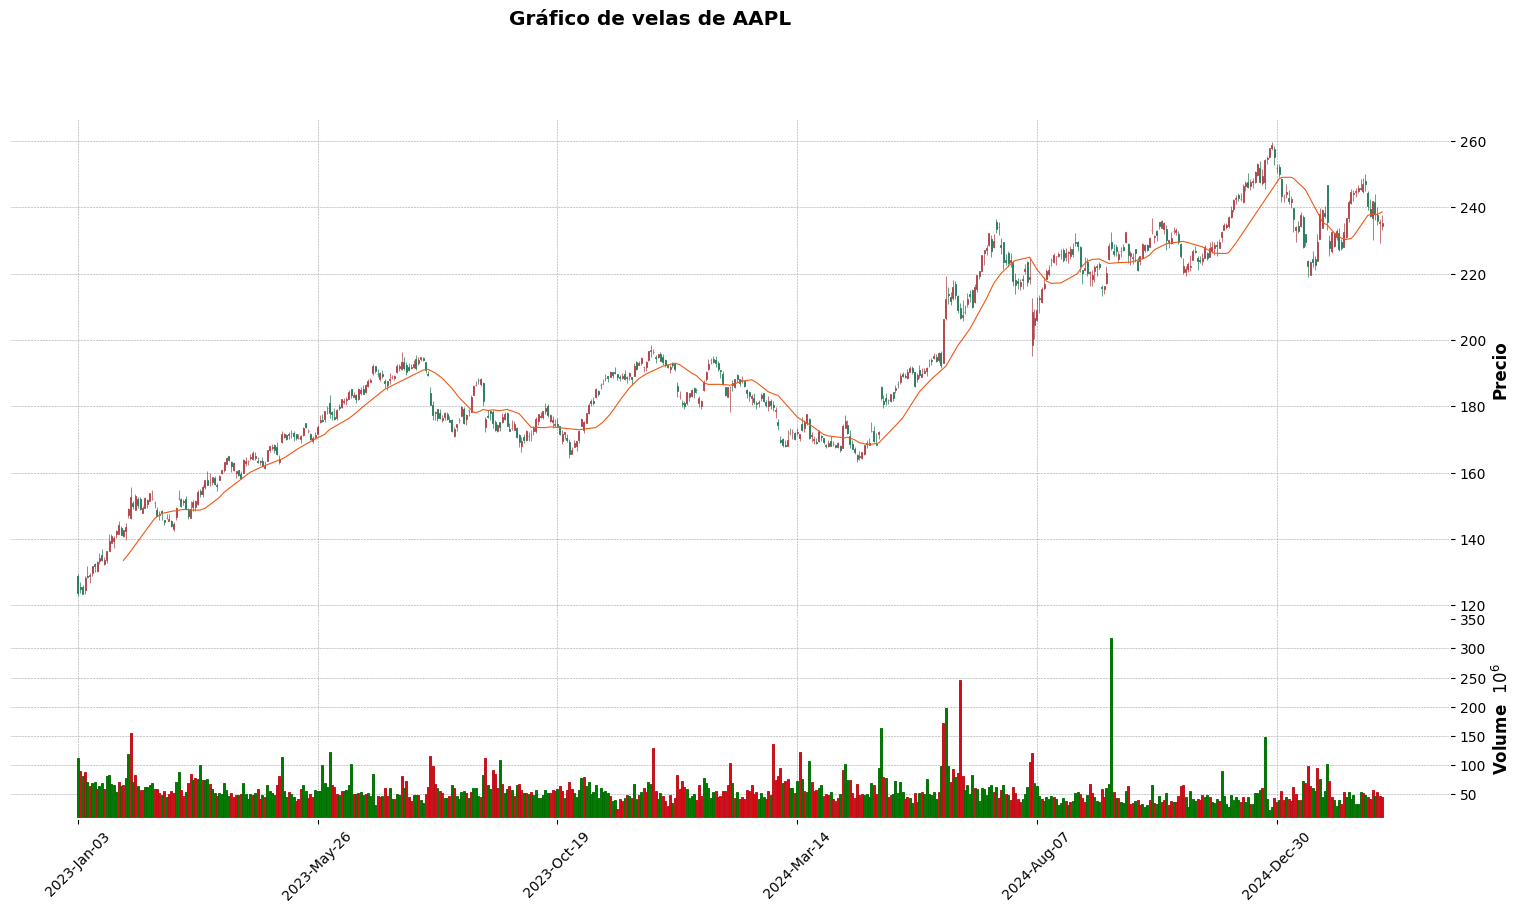

In [49]:
# Configurar el gráfico de velas con la media móvil
mpf.plot(data, type='candle', style='charles',
         title=f'Gráfico de velas de {ticker}',
         ylabel='Precio',
         mav=(20,),  # Agrega la media móvil de 20 periodos
         volume=True,
         figsize=(20, 10))

In [50]:
#Creamos columnas de retorno y etiquetamos jornadas alcistas y jormadas bajistas
data["daily_return"] = data["Close"].pct_change()
data["state"] = np.where(data["daily_return"] >= 0, "up", "down")


In [51]:
data

,Open,High,Low,Close,Volume,daily_return,state
Date,,,,,,,
2023-01-03,123.632523,129.395510,122.742865,128.782641,112117500,NaN,down
2023-01-04,124.907700,127.181268,123.642412,125.431607,89113600,-0.026021,down
2023-01-05,123.583092,126.301485,123.326085,125.668841,80962700,0.001891,up
2023-01-06,128.130234,128.792531,123.454601,124.561732,87754700,-0.008810,down
2023-01-09,128.654129,131.876670,128.397123,128.970458,70790800,0.035394,up
...,...,...,...,...,...,...,...
2025-02-28,241.839996,242.089996,230.199997,236.949997,56833400,-0.010275,down
2025-03-03,238.029999,244.029999,236.110001,241.789993,47184000,0.020426,up
2025-03-04,235.929993,240.070007,234.679993,237.710007,53798100,-0.016874,down


<Axes: xlabel='Date'>

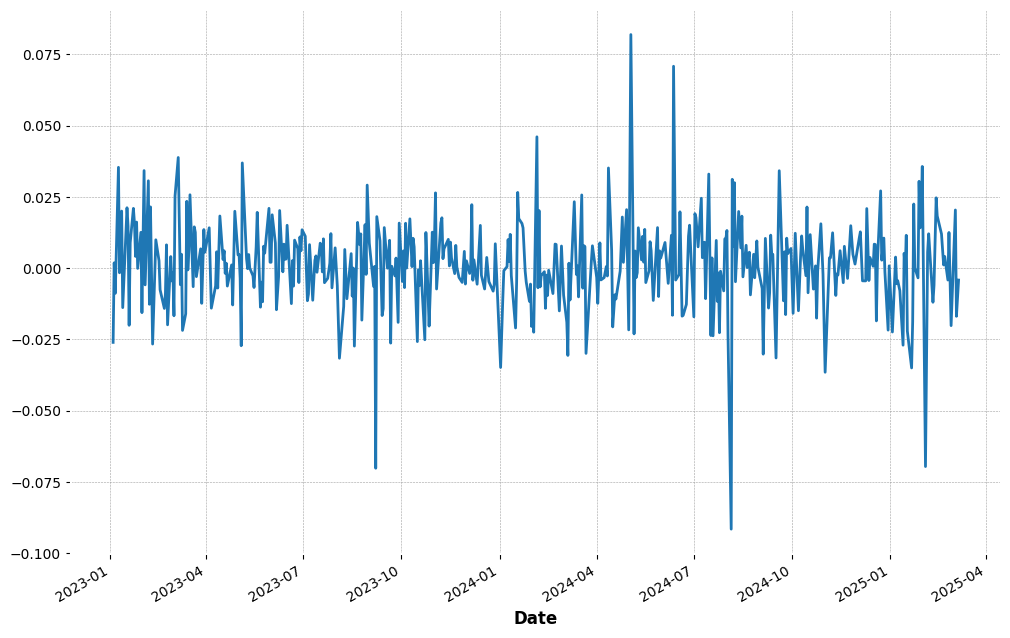

In [52]:
data['daily_return'].plot(figsize=(12, 8))

In [53]:
#Conteo de probabilidades 'up y 'down'
up_counts = len(data[data["state"] == "up"])
down_counts = len(data[data["state"] == "down"])
up_to_up = len(data[(data["state"] == "up") & (data["state"].shift(-1) == "up") ]) / len(data.query('state=="up"'))
down_to_up = len(data[(data["state"] == "up") & (data["state"].shift(-1) == "down")]) / len(data.query('state=="up"'))
up_to_down = len(data[(data["state"] == "down") & (data["state"].shift(-1) == "up")]) / len(data.query('state=="down"'))
down_to_down = len(data[(data["state"] == "down") & (data["state"].shift(-1) == "down")]) / len(data.query('state=="down"'))
transition_matrix = pd.DataFrame({
    "up": [up_to_up, up_to_down],
    "down": [down_to_up, down_to_down]
}, index=["up", "down"])

print(transition_matrix)

            up      down
up    0.560811  0.439189
down  0.522088  0.473896


## Momentum Strategy

In [54]:
data['9-day'] = data['Close'].rolling(9).mean()
data['21-day'] = data['Close'].rolling(21).mean()
data[19:25]

,Open,High,Low,Close,Volume,daily_return,state,9-day,21-day
Date,,,,,,,,,
2023-01-31,142.631607,142.681035,140.644714,141.059885,65874500,-0.015591,down,138.684194,NaN
2023-02-01,143.758514,144.924960,139.695767,142.315303,77663600,0.008900,up,139.770451,133.989258
2023-02-02,149.086578,149.442426,146.467027,147.188632,118339000,0.034243,up,141.266389,134.865734
2023-02-03,152.724289,155.571193,146.130951,146.328649,154357300,-0.005843,down,142.354845,135.860831
2023-02-06,149.986084,151.340348,149.047006,150.816441,69858300,0.030669,up,143.701408,137.058336
2023-02-07,152.872543,153.445879,148.908637,148.908637,83322600,-0.012650,down,144.772289,138.217712


## Agregar la columna "señal"

In [55]:
data['signal'] = np.where(data['9-day'] > data['21-day'], 1, 0)
data['signal'] = np.where(data['9-day'] < data['21-day'], -1, data['signal'])
data.dropna(inplace=True)
data.head()

,Open,High,Low,Close,Volume,daily_return,state,9-day,21-day,signal
Date,,,,,,,,,,
2023-02-01,143.758514,144.924960,139.695767,142.315303,77663600,0.008900,up,139.770451,133.989258,1
2023-02-02,149.086578,149.442426,146.467027,147.188632,118339000,0.034243,up,141.266389,134.865734,1
2023-02-03,152.724289,155.571193,146.130951,146.328649,154357300,-0.005843,down,142.354845,135.860831,1
2023-02-06,149.986084,151.340348,149.047006,150.816441,69858300,0.030669,up,143.701408,137.058336,1
2023-02-07,152.872543,153.445879,148.908637,148.908637,83322600,-0.012650,down,144.772289,138.217712,1


## Calcular Retornos instantáneos/Retornos del sistema de trading

In [56]:
data['log_return'] = np.log(data['Close']).diff()
data['system_return'] = data['signal'] * data['log_return']
data['entry'] = data.signal.diff()
data.head()

,Open,High,Low,Close,Volume,daily_return,state,9-day,21-day,signal,log_return,system_return,entry
Date,,,,,,,,,,,,,
2023-02-01,143.758514,144.924960,139.695767,142.315303,77663600,0.008900,up,139.770451,133.989258,1,NaN,NaN,NaN
2023-02-02,149.086578,149.442426,146.467027,147.188632,118339000,0.034243,up,141.266389,134.865734,1,0.033670,0.033670,0.0
2023-02-03,152.724289,155.571193,146.130951,146.328649,154357300,-0.005843,down,142.354845,135.860831,1,-0.005860,-0.005860,0.0
2023-02-06,149.986084,151.340348,149.047006,150.816441,69858300,0.030669,up,143.701408,137.058336,1,0.030208,0.030208,0.0
2023-02-07,152.872543,153.445879,148.908637,148.908637,83322600,-0.012650,down,144.772289,138.217712,1,-0.012731,-0.012731,0.0


In [63]:
data['entry'].value_counts()

,count
entry,
0.0,502
-2.0,11
2.0,11


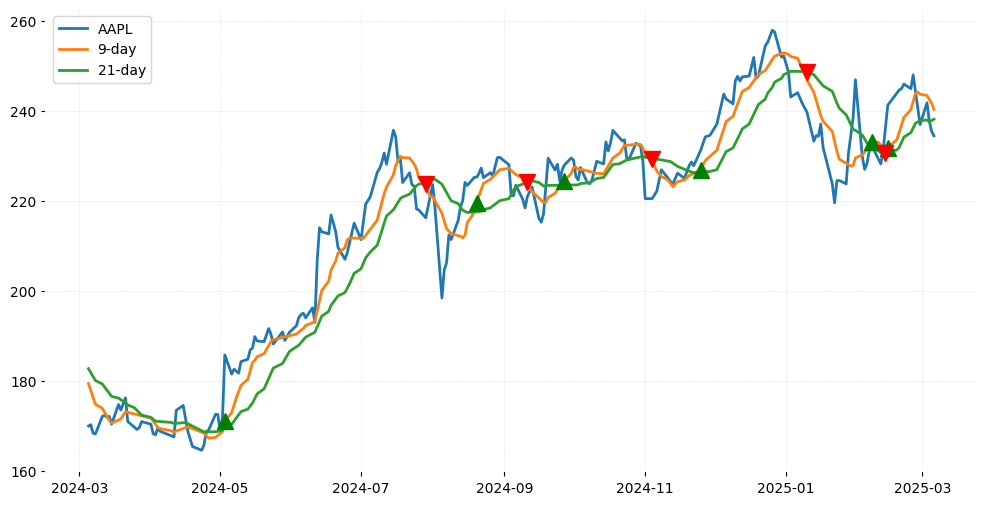

In [57]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(data.iloc[-252:]['Close'], label = 'AAPL')
plt.plot(data.iloc[-252:]['9-day'], label = '9-day')
plt.plot(data.iloc[-252:]['21-day'], label = '21-day')
plt.plot(data[-252:].loc[data.entry == 2].index, data[-252:]['9-day'][data.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(data[-252:].loc[data.entry == -2].index, data[-252:]['21-day'][data.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

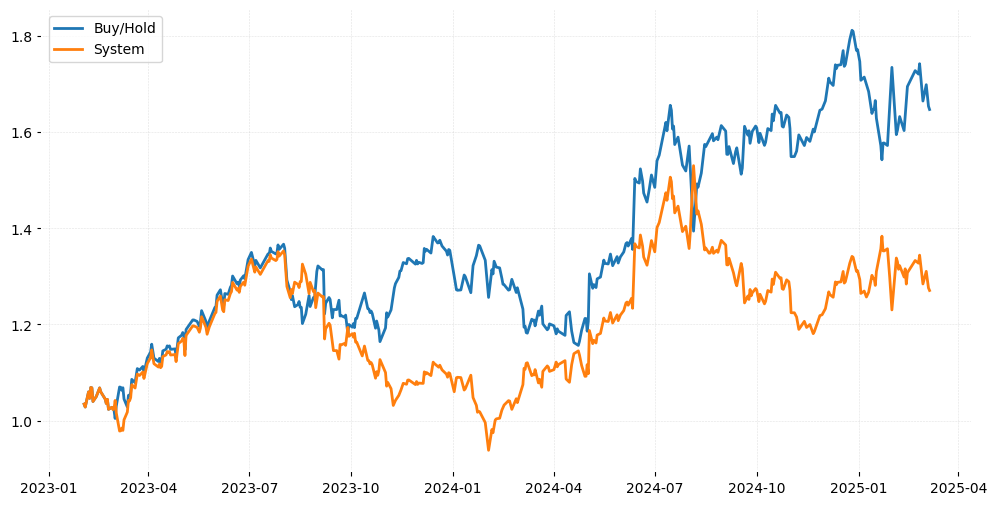

In [58]:
plt.plot(np.exp(data['log_return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(data['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

### Back Testing

In [59]:
np.exp(data['log_return']).cumprod()[-1] -1

<ipython-input-59-608b896a3eb5>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.exp(data['log_return']).cumprod()[-1] -1


np.float64(0.6473281316751842)

In [60]:
np.exp(data['system_return']).cumprod()[-1]-1

<ipython-input-60-77807ed6a4f3>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.exp(data['system_return']).cumprod()[-1]-1


np.float64(0.27070213184126235)

### Reto

Crear una Estrategia de Trading basada en conteo de probabilidades de Markov que supere en rentabilidad acumulada de la estrategia de momento y de la de Buy and Hold